In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
# Importando dataframe
df = pd.read_csv('EMGDataset.csv')

# Renomeando as colunas
df.columns = ['supercilio', 'zigomatico', 'expressao']

# Printando as primeiras linhas
df

,supercilio,zigomatico,expressao
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
49994,2346.0,1932.0,5.0
49995,2311.0,1888.0,5.0
49996,2234.0,1904.0,5.0
49997,2167.0,1920.0,5.0


Text(0, 0.5, 'Zigomatico')

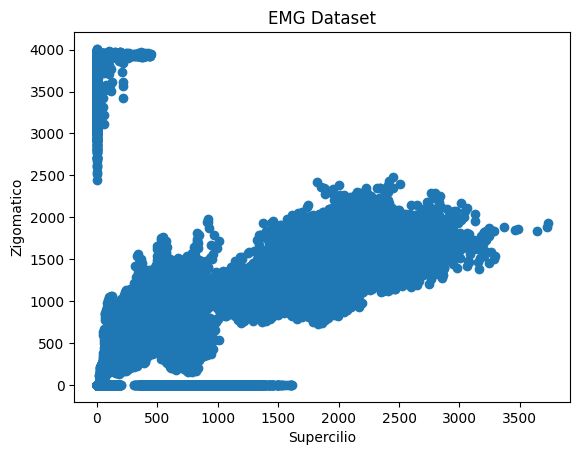

In [7]:
# 1. Plotando os dados em um grafico de espalhamento
plt.scatter(df['supercilio'], df['zigomatico'])
plt.title('EMG Dataset')
plt.xlabel('Supercilio')
plt.ylabel('Zigomatico')

In [9]:
# 2. Setando o numero de epochs
epochs = 100

In [10]:
# 3. Gerando os modelos: MQO e MQO regularizado
def MQO(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def MQO_regularizado(X, y, alpha= 1):
    return np.linalg.inv(X.T.dot(X) + alpha * np.eye(X.shape[1])).dot(X.T).dot(y)

In [13]:
# 4. Encontrando acuracia media dos dois modelos
def acuracia_media(X, y, epochs, modelo):
    acuracias = []
    for _ in range(epochs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # colocando uma seed para reproduzir os resultados
        w = modelo(X_train, y_train)
        y_pred = X_test.dot(w)
        acuracias.append(np.mean(np.abs(y_test - y_pred)))
    return np.mean(acuracias)

print('Acuracia media do MQO:', acuracia_media(df[['supercilio', 'zigomatico']], df['expressao'], epochs, MQO))
print('Acuracia media do MQO regularizado:', acuracia_media(df[['supercilio', 'zigomatico']], df['expressao'], epochs, MQO_regularizado))


Acuracia media do MQO: 1.0727887786307087
Acuracia media do MQO regularizado: 1.0725522656715092


### Acuracia media nao muito distante entre os dois modelos

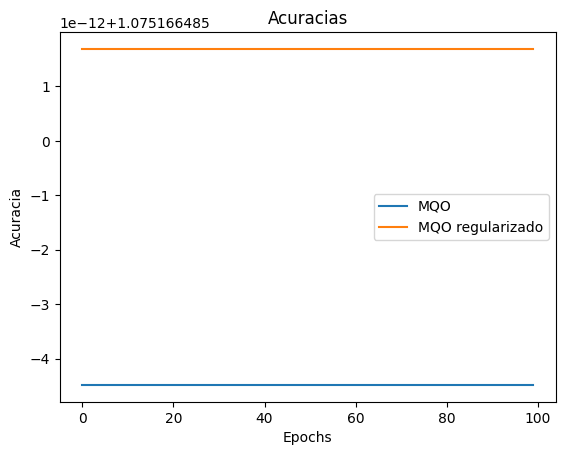

In [14]:
# 6. Treinando os dois modelos
# Vetor para armazenar as acuracias
acuracia_MQO = []
acuracia_MQO_regularizado = []

for _ in range(epochs):
    # Dividindo o dataset em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(df[['supercilio', 'zigomatico']], df['expressao'], test_size=0.2, random_state=42) # colocando uma seed para reproduzir os resultados
    
    #Forward pass
    w_MQO = MQO(X_train, y_train)
    w_MQO_regularizado = MQO_regularizado(X_train, y_train)
    
    #Predicoes
    y_pred_MQO = X_test.dot(w_MQO)
    y_pred_MQO_regularizado = X_test.dot(w_MQO_regularizado)
    
    # Armazenando as acuracias
    acuracia_MQO.append(np.mean(np.abs(y_test - y_pred_MQO)))
    acuracia_MQO_regularizado.append(np.mean(np.abs(y_test - y_pred_MQO_regularizado)))

# 7. Plotando as acuracias
plt.plot(acuracia_MQO, label='MQO')
plt.plot(acuracia_MQO_regularizado, label='MQO regularizado')
plt.title('Acuracias')
plt.xlabel('Epochs')
plt.ylabel('Acuracia')
plt.legend()
plt.show()

In [20]:
# Gerando estatisticas para cada modelo
print('MQO')
media_MQO = np.mean(acuracia_MQO)
desvio_MQO = np.std(acuracia_MQO)
maximo_MQO = np.max(acuracia_MQO)
minimo_MQO = np.min(acuracia_MQO)
moda_MQO = np.argmax(np.bincount(acuracia_MQO))
print('Media:', media_MQO)
print('Desvio padrao:', desvio_MQO)
print('Valor maximo:', maximo_MQO)
print('Valor minimo:', minimo_MQO)
print('Moda:', moda_MQO)

# Gerando estatisticas para cada modelo
print('MQO regularizado')
media_MQO_regularizado = np.mean(acuracia_MQO_regularizado)
desvio_MQO_regularizado = np.std(acuracia_MQO_regularizado)
maximo_MQO_regularizado = np.max(acuracia_MQO_regularizado)
minimo_MQO_regularizado = np.min(acuracia_MQO_regularizado)
moda_MQO_regularizado = np.argmax(np.bincount(acuracia_MQO_regularizado))
print('Media:', media_MQO_regularizado)
print('Desvio padrao:', desvio_MQO_regularizado)
print('Valor maximo:', maximo_MQO_regularizado)
print('Valor minimo:', minimo_MQO_regularizado)
print('Moda:', moda_MQO_regularizado)

# Gerando dataframe com as estatisticas
df_estatisticas = pd.DataFrame({
    'MQO': [media_MQO, desvio_MQO, maximo_MQO, minimo_MQO, moda_MQO],
    'MQO regularizado': [media_MQO_regularizado, desvio_MQO_regularizado, maximo_MQO_regularizado, minimo_MQO_regularizado, moda_MQO_regularizado]
}, index=['Media', 'Desvio padrao', 'Valor maximo', 'Valor minimo', 'Moda'])
df_estatisticas




MQO
Media: 1.075166484695515
Desvio padrao: 0.0
Valor maximo: 1.075166484695515
Valor minimo: 1.075166484695515
Moda: 1
MQO regularizado
Media: 1.07516648470169
Desvio padrao: 2.220446049250313e-16
Valor maximo: 1.0751664847016897
Valor minimo: 1.0751664847016897
Moda: 1


,MQO,MQO regularizado
Media,1.075166,1.075166e+00
Desvio padrao,0.000000,2.220446e-16
Valor maximo,1.075166,1.075166e+00
Valor minimo,1.075166,1.075166e+00
Moda,1.000000,1.000000e+00
